This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters

In [1]:
import pandas as pd
from sklearn import linear_model #for linear reg
from sklearn.svm import SVR #for support vector
from sklearn.tree import DecisionTreeRegressor #for decision tree
from sklearn.ensemble import RandomForestRegressor #for random forest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv("D:\Data Science\datasets\Other datasets\EnergyEff.csv")

In [19]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [20]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [22]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

#### The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

##### Specifically:
- X1	Relative Compactness
- X2	Surface Area
- X3	Wall Area
- X4	Roof Area
- X5	Overall Height
- X6	Orientation
- X7	Glazing Area
- X8	Glazing Area Distribution
- y1	Heating Load
- y2	Cooling Load

In [23]:
#Target and Feature Variables
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = df[['Y1', 'Y2']]

In [24]:
#Divide the dataset among training and testing data in 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [25]:
#Create linear regression object
regr1 = linear_model.LinearRegression()

#Train the model using training sets
regr1.fit(X_train, y_train)

#Make predictions using testing set
y_pred1 = regr1.predict(X_test)

In [26]:
#Coefficients
print("Coefficients: \n",regr1.coef_)
#Intercept
print("Intercept:\n", regr1.intercept_)
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred1))
#Coefficient of determination: 1 is perfect prediction
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred1))

Coefficients: 
 [[-6.21292978e+01 -2.90673928e+11  2.90673928e+11  5.81347855e+11
   4.12484264e+00 -3.24974433e-02  2.01413017e+01  2.10892732e-01]
 [-7.10060382e+01  8.91405822e+10 -8.91405822e+10 -1.78281164e+11
   4.04575753e+00  5.52672623e-02  1.47881657e+01  3.37913440e-02]]
Intercept:
 [ 80.16474422 100.46491657]
Mean Squared Error: 9.50
Coefficient of Determination: 0.90


# Decision Tree 

In [29]:
#Create decision tree object
regr2 = DecisionTreeRegressor(max_depth=5)

#Train the model using training sets
regr2.fit(X_train, y_train)

#Make predictions using testing set
y_pred2 = regr2.predict(X_test)

In [30]:
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred2))
#Coeff of Determination
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred2))

Mean Squared Error: 2.44
Coefficient of Determination: 0.97


# Random Forest 

In [27]:
#Create decision tree object
regr3 = RandomForestRegressor(max_depth=2, random_state=0)

#Train the model using training sets
regr3.fit(X_train, y_train)

#Make predictions using testing set
y_pred3 = regr3.predict(X_test)

In [28]:
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred3))
#Coeff of Determination
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred3))

Mean Squared Error: 10.96
Coefficient of Determination: 0.89


# Support Vector Machine 

In [34]:
from sklearn.multioutput import MultiOutputRegressor
#Create decision tree object
multi = SVR(C=5.0, epsilon=0.8)
regr4 = MultiOutputRegressor(multi)

#Train the model using training sets
regr4.fit(X_train, y_train)

#Make predictions using testing set
y_pred4 = regr4.predict(X_test)

In [35]:
#Mean Squared Error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred4))
#Coeff of Determination
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_pred4))

Mean Squared Error: 20.70
Coefficient of Determination: 0.79


# Preperation for Comparison

In [36]:
# Mean Squared Errors
mse_lr = mean_squared_error(y_test, y_pred1)
mse_dt = mean_squared_error(y_test, y_pred2)
mse_rf = mean_squared_error(y_test, y_pred3)
mse_svm = mean_squared_error(y_test, y_pred4)

In [37]:
#R2_Scores
r2_lr = r2_score(y_test, y_pred1)
r2_dt = r2_score(y_test, y_pred2)
r2_rf = r2_score(y_test, y_pred3)
r2_svm = r2_score(y_test, y_pred4)

In [38]:
#Matplotlib in rescue for visual comparison
import matplotlib.pyplot as plt

In [39]:
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines']
mse = [mse_lr, mse_dt, mse_rf, mse_svm]
cod = [r2_lr, r2_dt, r2_rf, r2_svm]

# Plot for Comparison wrt Mean Squared Error 

Text(0, 0.5, 'Error')

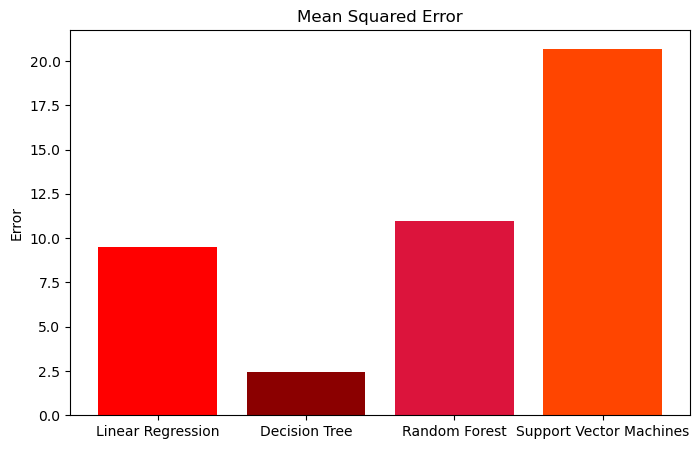

In [41]:
plt.figure(figsize=(8,5))
plt.bar(labels, mse, color=['#FF0000', '#8B0000', '#DC143C', '#FF4500'])
plt.title('Mean Squared Error')
plt.ylabel('Error')

In [42]:
# Choose the model with the lowest MSE
best_model = min([(mse_lr, 'Linear Regression'), (mse_dt, 'Decision Tree'), (mse_rf, 'Random Forest'), (mse_svm, 'SVM')])

print("Best Model:", best_model[1])

Best Model: Decision Tree


Among the all the Machine Learing Algorithms we used for the comparison, in case of Mean Squared Error, Decision Tree stood out to be the go to algorithm because we got the lowest value from this model

##### Increasing order of values
- Decision Tree - 2.44
- Linear Regression - 9.50
- Random Forest - 10.96
- Support Vector Machine - 20.70

# Plot for Comparison wrt Coefficient of Determination  

Text(0, 0.5, 'Error')

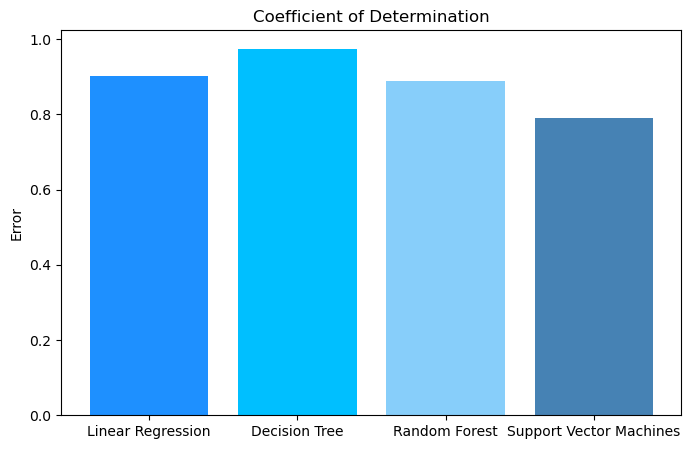

In [43]:
plt.figure(figsize=(8,5))
plt.bar(labels, cod, color=['#1E90FF', '#00BFFF', '#87CEFA', '#4682B4'])
plt.title('Coefficient of Determination')
plt.ylabel('Error')

In [44]:
# Choose the model with the highest R2_Score
best_model = max([(r2_lr, 'Linear Regression'), (r2_dt, 'Decision Tree'), (r2_rf, 'Random Forest'), (r2_svm, 'SVM')])

print("Best Model:", best_model[1])

Best Model: Decision Tree


Among the all the Machine Learing Algorithms we used for the comparison, in case of Coefficient of Determination, Decision Tree stood out to be the go to algorithm because we got the highest value from this model

##### Decreasing order of values
- Decision Tree - 0.97
- Linear Regression - 0.90
- Random Forest - 0.89
- Support Vector Machine - 0.79

# Moment of Truth

Decision Tree turns out to be the best algorithm to go with in this case of comparison.